In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import math

#プロット用
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# ロジスティック回帰用分析用のモジュール
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
from sklearn import metrics

In [5]:
import statsmodels.api as sm

C:\Users\yuji\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\yuji\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Text(0.5, 1.0, 'Logistic Function')

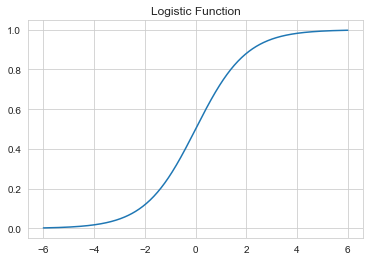

In [7]:
# シグモイド関数を描画してみる
def logistic(t):
    return 1.0/(1 + math.exp(-1.0*t))
t = np.linspace(-6, 6, 500)
y = np.array([logistic(ele) for ele in t])

plt.plot(t,y)
plt.title('Logistic Function')

## ロジスティック回帰２

In [9]:
df = sm.datasets.fair.load_pandas().data
df.head()
# affairsが目的変数（不倫の有無）

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [12]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [14]:
df['Had_affairs'] = df['affairs'].apply(affair_check)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [15]:
# Had_affairsで層別する
df.groupby('Had_affairs').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_affairs,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


C:\Users\yuji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

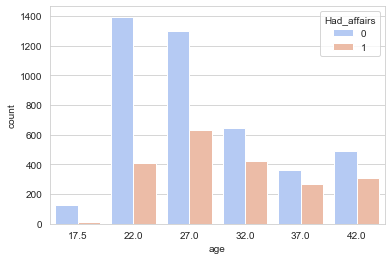

In [25]:
sns.countplot('age', data=df.sort_values('age'), hue='Had_affairs', palette='coolwarm')

C:\Users\yuji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='yrs_married', ylabel='count'>

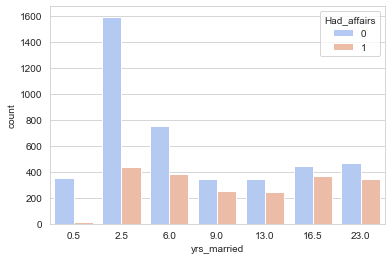

In [27]:
# 結婚してからの年数でプロットする

sns.countplot('yrs_married', data=df.sort_values('yrs_married'), hue='Had_affairs', palette='coolwarm')
            

C:\Users\yuji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='count'>

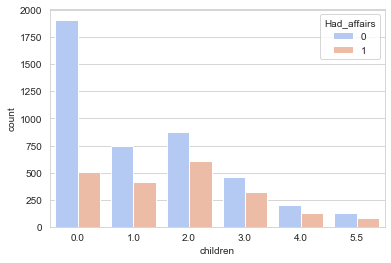

In [28]:
sns.countplot('children', data=df.sort_values('children'), hue='Had_affairs', palette='coolwarm')

## ロジスティック回帰3 データの前処理

In [30]:
"""
職業(Occupation 、 Husband's Occupation)はカテゴリーデータだが連続値ではない（数字の大小に意味がない）
よってダミー変数に置き換える
"""
occ_dummies = pd.get_dummies(df.occupation)
hus_occ_dummies = pd.get_dummies(df.occupation_husb)
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [31]:
# 読みにくいのでタイトルを変換する
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [44]:
X = df.drop({'occupation', 'occupation_husb', 'Had_affairs'}, axis =1)

In [45]:
dummies = pd.concat([occ_dummies, hus_occ_dummies], axis = 1)

In [46]:
X = pd.concat([X, dummies], axis = 1)

In [47]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [38]:
# 目的変数の確認
Y=df.Had_affairs
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_affairs, dtype: int64

## 多重共線性

In [48]:
X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)

X = X.drop('affairs',axis=1)

X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [54]:
# Yを1次元のarrayにする
#Y.values　でもOK
Y = np.ravel(Y)

## ロジスティック回帰を実行する

In [55]:
log_model = LogisticRegression()
log_model.fit(X, Y)

C:\Users\yuji\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
log_model.score(X,Y)

0.726358781024191

In [60]:
# 作ったモデルをデータフレームにする
coeff_df = DataFrame([X.columns, log_model.coef_[0]]).T
coeff_df

,0,1
0,rate_marriage,-0.69476
1,age,-0.056653
2,yrs_married,0.09947
3,children,0.03473
4,religious,-0.363196
5,educ,0.015395
6,occ2,0.354614
7,occ3,0.625416
8,occ4,0.341555
9,occ5,0.901301


In [61]:
log_model

LogisticRegression()

In [62]:
## データをテスト用とトレーニング用に分けて回帰分析を行う
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [63]:
log_model2 = LogisticRegression()

In [64]:
log_model2.fit(X_train, Y_train)

C:\Users\yuji\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
# テスト用のデータで検証する
class_predict = log_model2.predict(X_test)
class_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
# 目的変数を使って答え合わせ
metrics.accuracy_score(Y_test, class_predict)

0.717964824120603

## 80. ロジスティック回帰 - 多クラス分類(3つ以上のクラス分け)

### あやめのデータセット
3つのクラス

Iris-setosa (n=50)
Iris-versicolor (n=50)
Iris-virginica (n=50)


説明変数 4つ


萼片（sepal）の長さ（cm）
萼片（sepal）の幅（cm）
花びら（petal）の長さ（cm）
花びら（petal）の幅（cm）

本来はロジスティック回帰による二値分類の組み合わせにより多クラス分類を実現する

→ScikitLeranは優秀なので気にしなくてOK

In [68]:
from sklearn.datasets import load_iris

In [69]:
iris = load_iris()
X = iris.data 
Y = iris.target
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [73]:
print(iris.data.shape)

(150, 4)


In [76]:
iris_data = DataFrame(X, columns=['Sepal Length', 'Sepal Width','Petal Length', 'Petal Width'])
iris_target = DataFrame(Y, columns = [('Species')])

In [77]:
iris_data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [79]:
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [81]:
0/1をSetosa/Verscolour/Virginicaに置き換える
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Verscolour'
    else:
        return 'Virginica'

In [82]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [90]:
# 作ったデータをまとめる
iris = pd.concat([iris_data, iris_target], axis=1)
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


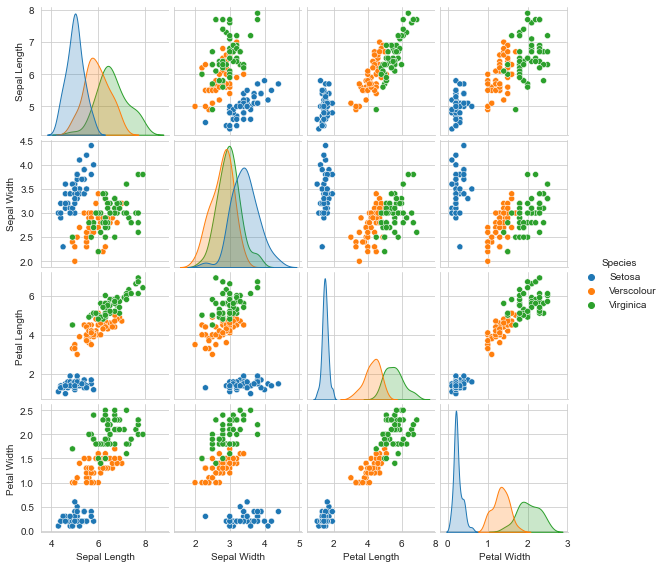

In [92]:
# 種別で層別する
sns.pairplot(iris, hue='Species', height = 2)

C:\Users\yuji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Petal Length', ylabel='count'>

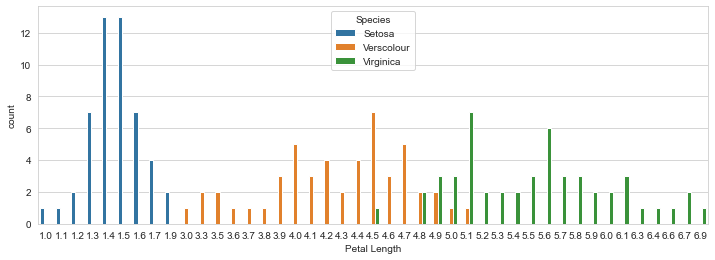

In [98]:
plt.figure(figsize=(12,4))
sns.countplot('Petal Length', data = iris, hue = 'Species')

In [96]:
## ロジスティック回帰で多クラス分類する

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [169]:
logreg = LogisticRegression()

In [170]:
# 全体の40%(デフォルトは30%)をテストに振り分ける : test_size
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.4, random_state = 3)

In [171]:
logreg.fit(X_train, Y_train)

C:\Users\yuji\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [172]:
from sklearn import metrics

In [173]:
# テストデータで予測する
Y_pred = logreg.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0,
       2, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1])

In [174]:
#正解率を求める: Y_test, Y_predで比較する
metrics.accuracy_score(Y_test, Y_pred)

0.9666666666666667

## k近傍法


In [175]:
from sklearn.neighbors import KNeighborsClassifier

In [176]:
# 近傍値を決める
knn = KNeighborsClassifier(n_neighbors= 6)

In [177]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [186]:
Y_pred = knn.predict(X_test)

In [188]:
metrics.accuracy_score(Y_test, Y_pred)

0.95

In [194]:
# 近傍値を変えてトライする
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

In [195]:
metrics.accuracy_score(Y_test, Y_pred)

0.9666666666666667

In [203]:
X_train.shape, Y_train.shape

((90, 4), (90,))

In [204]:
 Y_test.shape,  Y_pred.shape

((60,), (60,))

In [196]:
k_range = range(1, 90)
accuracy = []

In [206]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

ValueError: x and y must have same first dimension, but have shapes (89,) and (267,)

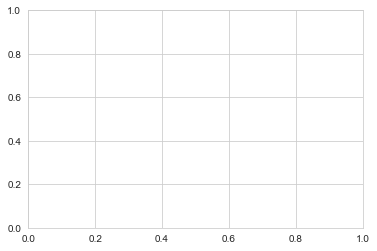

In [205]:
plt.plot(k_range, accuracy)